In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['Target'] = california_housing.target

In [3]:
X = data.drop('Target', axis=1)
y = data['Target']

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Target, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = linear_regressor.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.5558915986952438


In [16]:
r_squared = r2_score(y_test, y_pred)
print("R-squared Value:",r_squared)

R-squared Value: 0.5757877060324512


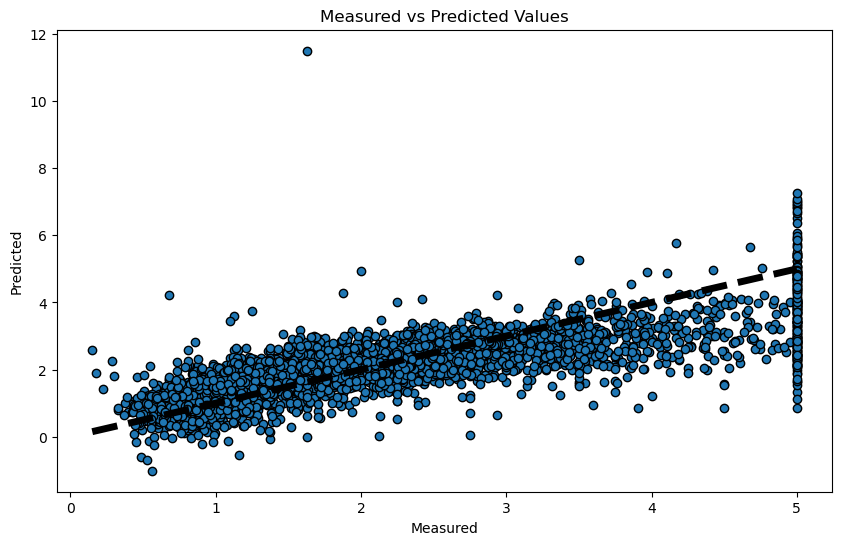

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=5)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values')
plt.show()

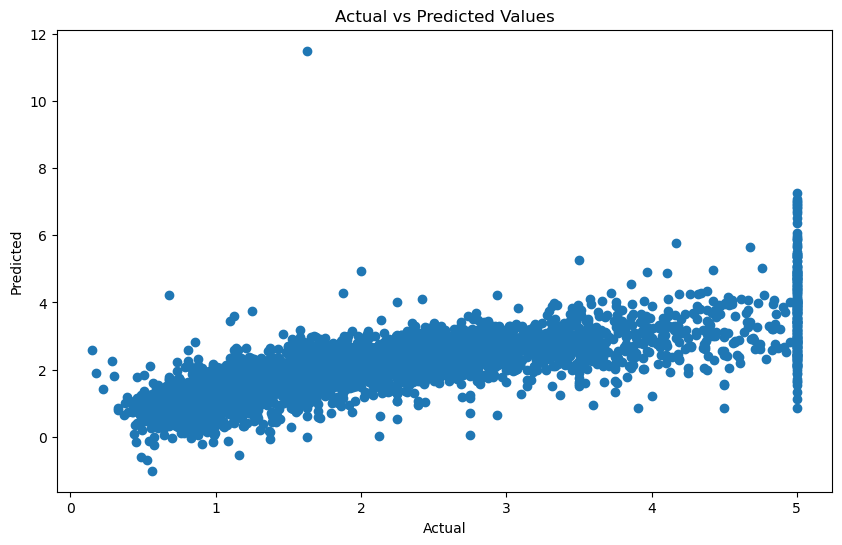

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [27]:
coefficients = pd.DataFrame(linear_regressor.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


In [30]:
for feature, coef in zip(X.columns, linear_regressor.coef_):
        print("The feature", feature, "has a coefficient of", round(coef, 4), 
          ". This means that for a one unit increase in", feature, 
          "the target variable changes by", round(coef, 4), 
          "holding all other features constant.")

The feature MedInc has a coefficient of 0.4487 . This means that for a one unit increase in MedInc the target variable changes by 0.4487 holding all other features constant.
The feature HouseAge has a coefficient of 0.0097 . This means that for a one unit increase in HouseAge the target variable changes by 0.0097 holding all other features constant.
The feature AveRooms has a coefficient of -0.1233 . This means that for a one unit increase in AveRooms the target variable changes by -0.1233 holding all other features constant.
The feature AveBedrms has a coefficient of 0.7831 . This means that for a one unit increase in AveBedrms the target variable changes by 0.7831 holding all other features constant.
The feature Population has a coefficient of -0.0 . This means that for a one unit increase in Population the target variable changes by -0.0 holding all other features constant.
The feature AveOccup has a coefficient of -0.0035 . This means that for a one unit increase in AveOccup the ta